In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

# batch 확인

In [3]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 2m 19s

In [4]:
adata.obs['sample'].unique()

['Pt1', 'Pt2', 'Pt3', 'Pt4', 'Pt5', ..., 'Pt20', 'Pt21', 'Pt22', 'Pt23', 'Pt24']
Length: 24
Categories (24, object): ['Pt1', 'Pt2', 'Pt3', 'Pt4', ..., 'Pt21', 'Pt22', 'Pt23', 'Pt24']

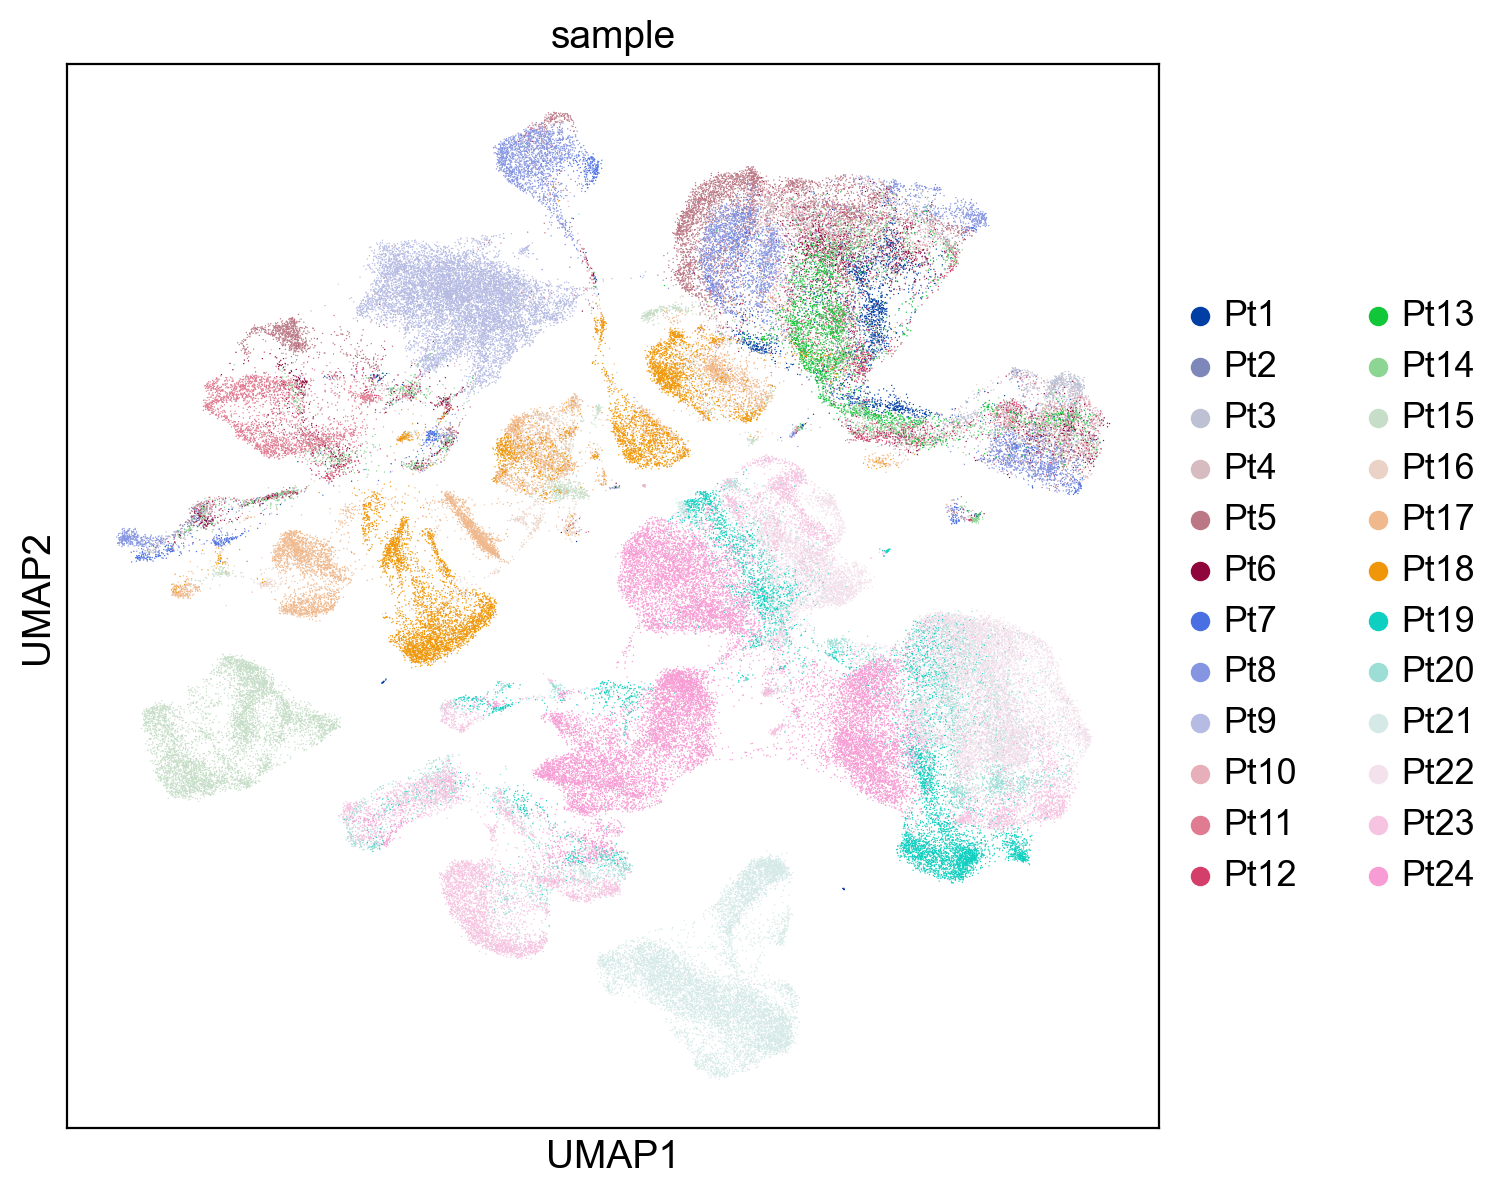

In [5]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample'
)

# batch correctino by BBKNN

In [6]:
# sc.external.pp.bbknn(adata, batch_key = 'sample')
import bbknn

bbknn.bbknn(adata, batch_key = 'sample')

# running time:  39" 40"

In [7]:
# sc.pp.pca(adata)
# sc.pp.neighbors(adata)
sc.tl.umap(adata)

# running time: 1' 29"

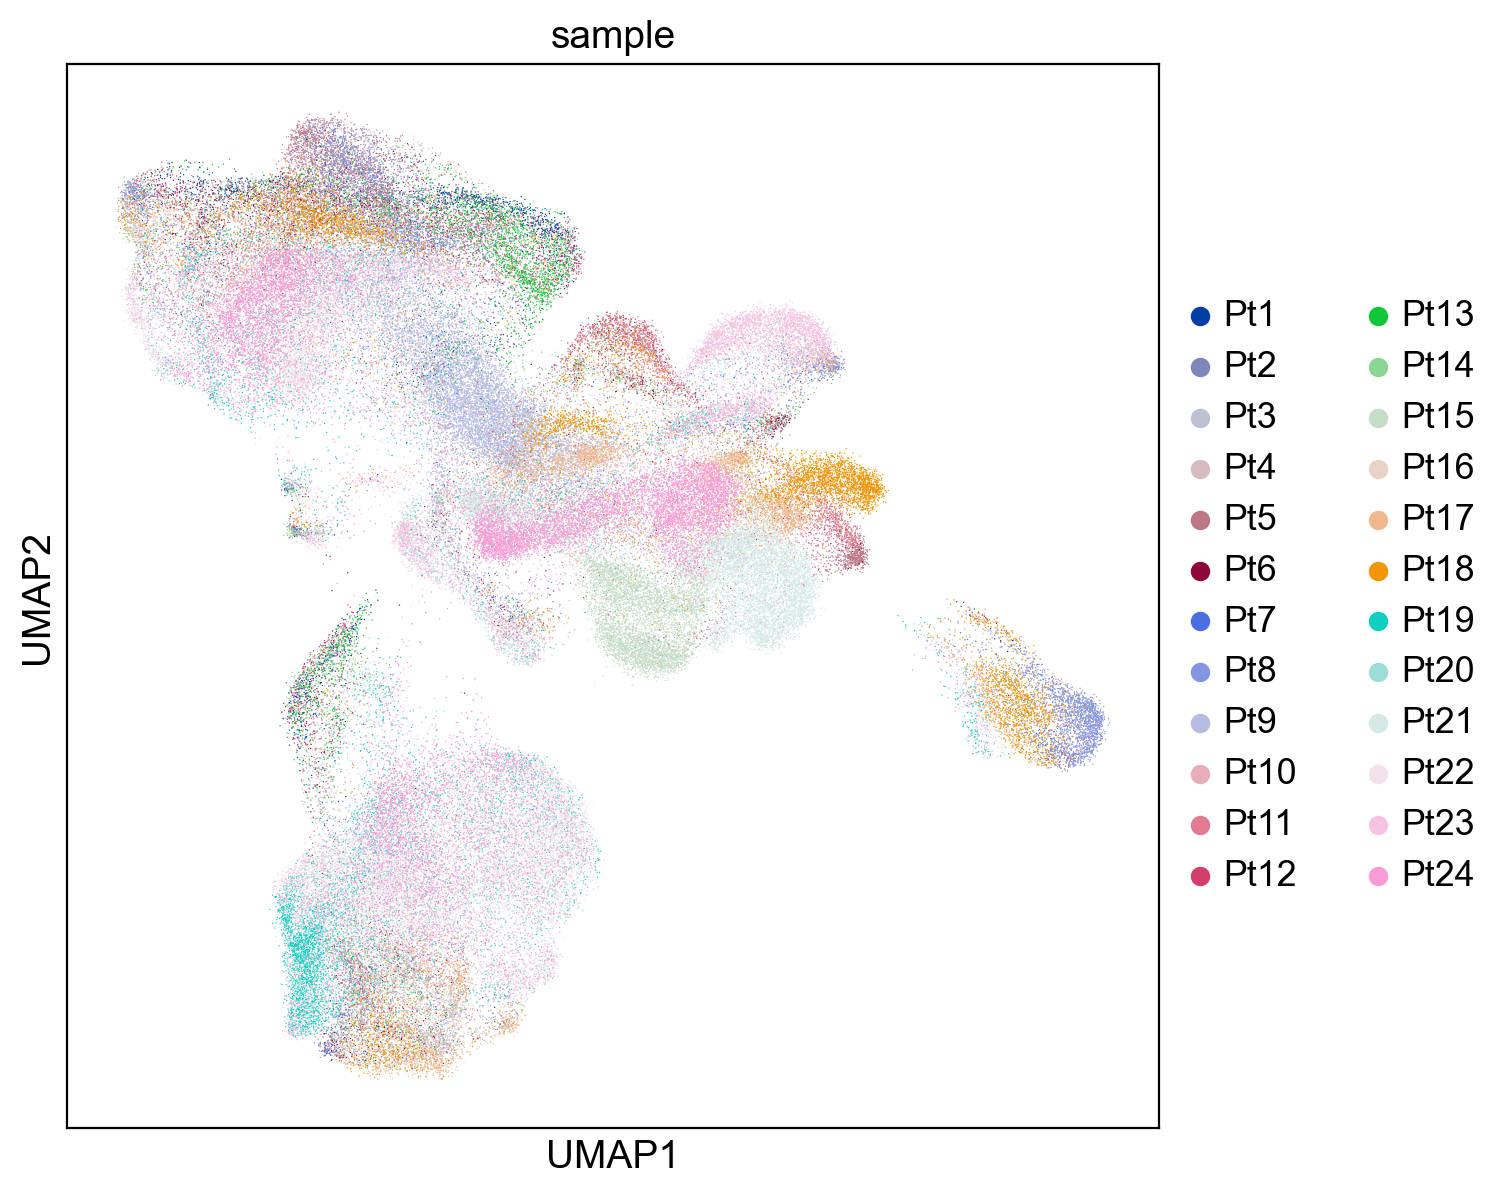

In [8]:
sc.settings.set_figure_params(dpi=100, figsize = (7, 7))
sc.pl.umap(
    adata,
    color = 'sample',
)

> 된건지 잘 모르겠음.\
> 아예 차이가 없는 듯\
> 원본 논문에서도 normal에서는 microglia가 대부분이었는데 tumor 에서 macrophage, T cell 등 다양한 세포가 생긴다고 나와서 그렇게 틀린거 같진 않기도 하고?

# Save

In [9]:
adata.write_h5ad(folder_path + "adata_BBKNN.h5ad")